# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

In our last set of notes, we saw a basic sample of supervised machine learning using a k-nearest neighbor classifier, classifying different types of fruit based on their various physical properties. Machine learning algorithms of this type are called **supervised learning algorithms** because they use labeled examples in the training set to learn how to predict the labels for new, previously unseen examples. The supervised aspect refers to the need for each training example to have a label in order for the algorithm to learn how to make accurate predictions on future examples.

This is in contrast to unsupervised machine learning where we don't have labels for the training data examples.

In this set of notes we'll focus on some higher-level goals. IE How to apply a number of specific supervised machine learning algorithms and how to interpret their results for important tasks.

In this week's notes, we won't have time to cover all the different parameters for the various supervise learning methods. So we'll focus on a small number of the most important parameters. The full details of all the supervised algorithms we'll cover this week are in the excellent online documentation that's provided with scikit-learn.

Before we go any further, let's review some of the basics we learned in the last set of notes. Below is an example of how to set up the k-nearest neighbor machine learning model we had last time.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


## Reading In and Creating Datasets

To explore different supervised learning algorithms, we're going to use a combination of small synthetic datasets as examples, together with some larger real world datasets. scikit-learn has a variety of methods in the `sklearn` datasets library to create synthetic datasets.

So for basic regression we'll start with the simple problem that has one informative input variable. One noisy linear output and 100 data set samples. The first plot below is of a data set using scatter plot with each point represented by one dot. The x-axis shows the future value, and the y-axis shows the regression target. To create this we use the make regression function in `sklearn` data sets. 

<IPython.core.display.Javascript object>


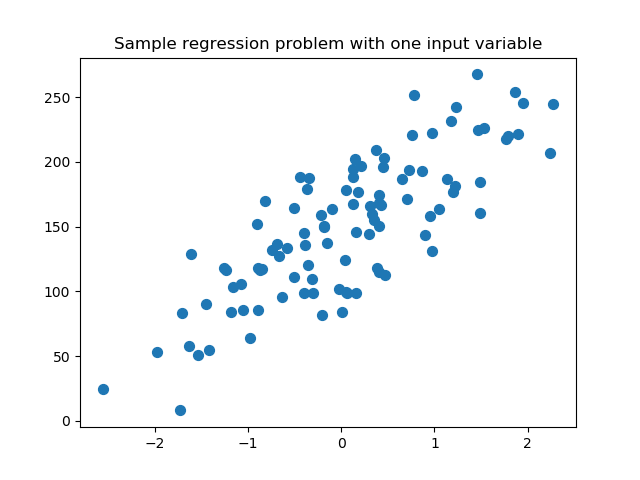

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


To illustrate binary classification we will include a simple two class dataset with two informative features. Here's a scatterplot showing each data instance as a dot with the first feature value corresponding to the x-axis, and the second feature value corresponding to the y-axis. The color of a point shows which class that data instance is labeled.

To create this data set we used to make classification function in `sklearn` data sets. Creating 100 points that roughly group the data samples into one cluster per class, with here a 10% chance of randomly flipping the correct label of any point just to make it a little more challenging the classifier.

<IPython.core.display.Javascript object>


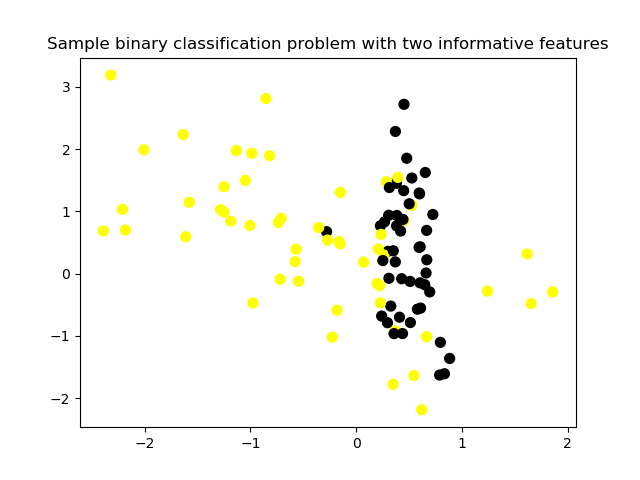

In [3]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

We'll also look at a more complex binary classification problem that uses two features, but where the two classes are not really linearly separable, instead forming into various clusters in different parts of the feature space. 

This dataset was created in two steps. First using the `make_blobs` function in `sklearn` datasets to randomly generate 100 samples in 8 different clusters, and then by changing the cluster label assigned by `make_blobs`, which is a number from 1 to 8, to a binary number by converting it using a modulo 2 function, assigning the even index points to class 0 and odd index points to class 1. 

<IPython.core.display.Javascript object>


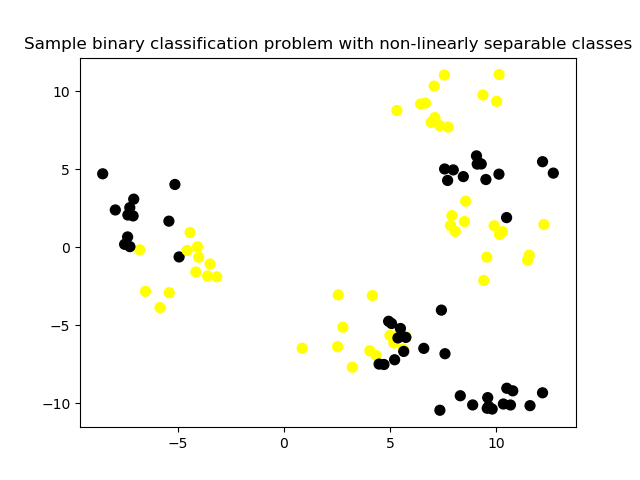

In [4]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

To illustrate multi-class classification, we'll use our familiar fruits dataset, which has four features and four possible target labels. This has already been read in, and we plotted it in the last notebook, so we'll skip over the explanation of this one for now.

To illustrate a real-world regression problem, we'll use a dataset derived from the communities and crime dataset in the UCI repository. Our dataset uses a subset of the original features and target values. Which were originally created from combining several U.S. government data sources, like the U.S. census. Each data instance corresponds to a particular geographic area, typically a town or a region of a city. Our version of this dataset has 88 features that encode various demographic and social economic properties of each location with 1994 location data instances. The target value that we'll try to predict is the per capita violent crime rate. 

In [5]:
# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

These two datasets weren't mentioned in the lecture, but I will include them anyway since I'm sure they'll come up later. They are labelled appropriately in the comments of the code below.

<IPython.core.display.Javascript object>


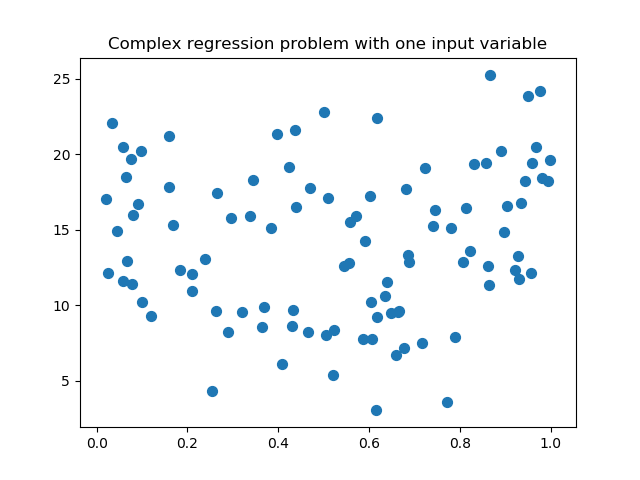

In [6]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

Something that's been bothering me so far about this weeks work is that I don't think I would consider regression to be a machine learning method. Instead I would classify it as a statistical method, especially since it can be mathematically calculated by hand and doesn't require a machine to "learn" what's going on in order to be used. I'll follow along for now, but I think linear regression should have been kept separate from this course.

## K-Nearest Neighbors

### Classification

Let's recall that, for classification, the k-Nearest Neighbor Classifier simply memorizes the entire training set, and then to classify a new instance does 3 steps. First, it finds the k-Nearest most similar instances to the new instance in the training set, then it gets the labels of those training instances, and then it predicts the label of the new instance as a function of the nearby training labels typically by a simple majority vote.

Here's how a k-Nearest Neighbor Classifier using only one nearest neighbor, that is with k equal to 1, makes these predictions for the simple binary synthetic dataset. 

<IPython.core.display.Javascript object>


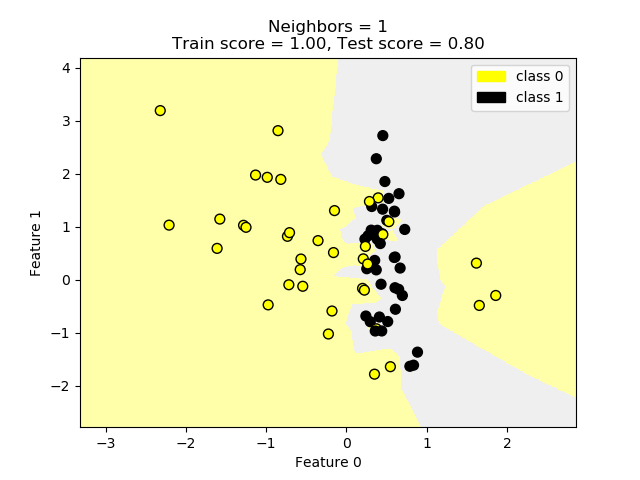

In [7]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)

Recall when we applied a nearest neighbors classifier to our multi-class fruit dataset, here we're applying the nearest neighbors classifier to our simple binary classification problem; here the points in class zero are labeled with yellow dots and the points in class one are labeled with black dots. And just as we did for the fruit classification, here we're also showing how the entire feature space is broken up into different decision regions according to the predictions that the k-Nearest Neighbor Classifier would make at each point in the decision space. So for example, a point out in the yellow region represents a point that the classifier would classify as class zero. And a point in the black region the classifier would classify as class one.

So because this is a one-nearest neighbors classifier, to make a classification prediction for any given query point, the Classifier simply looks back into its training set. So the points in our plot represent all the points on the training set. So for any given empty spot on the plot the Classifier would simply find the training point that's closest and assign the predict a class to simply the class of the nearest point in the training set.

So the k-Nearest Neighbor's Classifier with k = 1, we can see that the decision boundaries that derived from that prediction are quite jagged and have high variance. Because of this it has high complexity. And in fact, we can see that the one nearest neighbors classifier is over-fitting the training data in this case. It's trying to get correct predictions for every single training point while ignoring the general this trend between the two classes. So the one-nearest neighbor's classifier can be said to be over-fitting in this case.

And here is what happens when we increase k from 1 to 3, and even up to 11. These result have a much smoother decision boundary, which represents a model with lower model complexity where the decision boundary has much less variance.

<IPython.core.display.Javascript object>


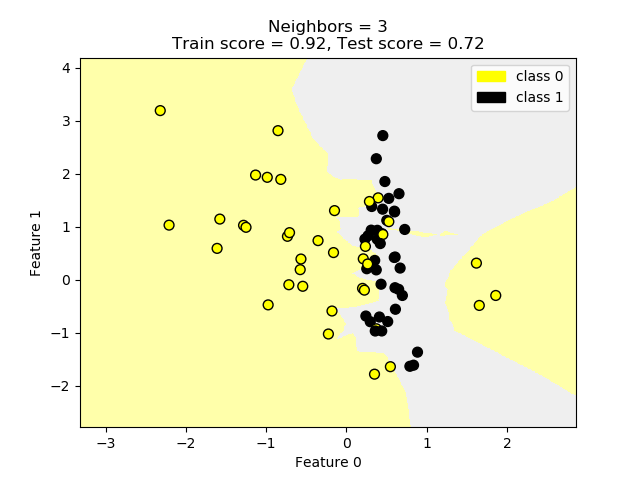

<IPython.core.display.Javascript object>


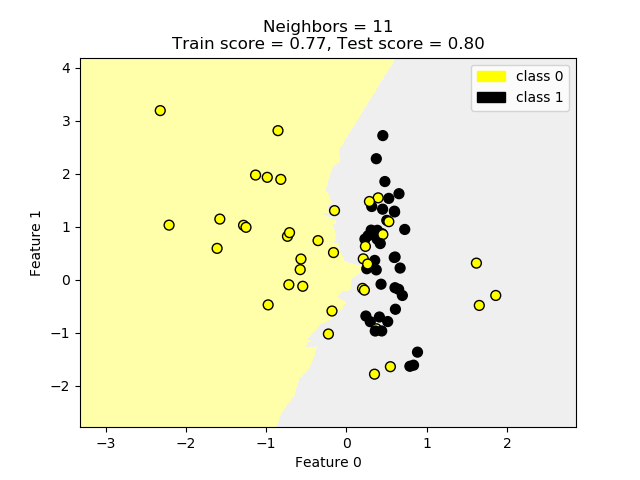

In [8]:
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

If we increased k even higher to be the total number of points in the training set, the result would be a single decision region where all predictions would be the most frequent class in the training data. As we saw for the fruit data set, k-Nearest Neighbor Classifiers can be applied to any number of classes, not just 2.

Also notice the scores in the titles of each graph. In the $k = 1$ case, the training score is a perfect $1.0$. But the test score is only $0.80$. As k increases to $3$, the training score drops to $0.92$ but the test score rises slightly to $.72$, indicating the model is generalizing better to new data. When $k = 11$, the training score drops a bit further to $0.77$, but the test score even better at $0.80$, indicating that this simple model is much more effective at ignoring minor variations in training data, and instead capturing the more important global trend in where the classes tend to be located with the best overall generalization performance as a result.

### Regression

The nearest neighbors approach isn't useful just for classification. You can use it for regression too. The code below uses the k- Neighbors Regressor Class, which like the classification case, takes the n-neighbor setting as a key parameter. This makes a regression model using the k-nearest neighbor method.

In [9]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


Because the target values in a regression problem are continuous as compared to the discrete values that we see for classifier target labels, to assess how well a regression model fits the data, we use a regression score called r-squared that's between 0 and 1. For the r-squared value, a value of 1 corresponds to the best possible performance, that would be a model that makes perfect predictions. A value of 0 corresponds to a model that makes a constant value prediction that's always just a mean value of all the training target values. The r-squared value is sometimes known as the coefficient of determination.

Below are examples of these models using $k = 1$ and $k = 3$. 

<IPython.core.display.Javascript object>


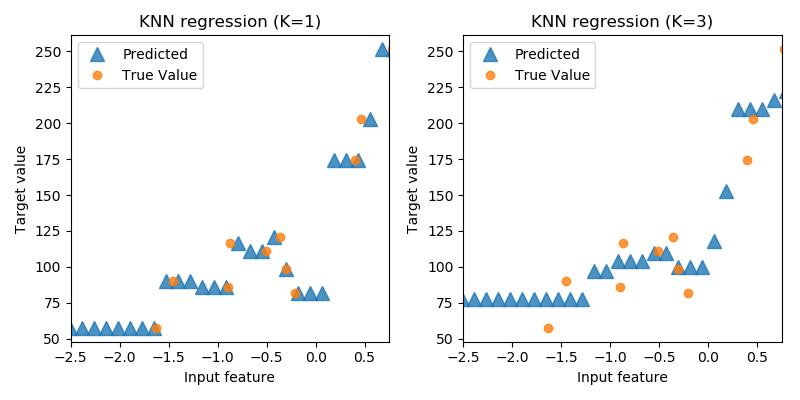

In [10]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

Just as we did for classification, let's look at the connection between model complexity and generalization ability as measured by the r-squared training and test values on the simple regression dataset. The below series of plots here in the notebook show how the KNN regression algorithm fits the data for $k = 1, 3, 7, 15$, and in an extreme case of $k = 55$, which represents almost half the training points. We can see the same pattern in model complexity for kNN regression that we saw for kNN classification. Namely, that small values of k give models with higher complexity. And large values of k result in simpler models with lower complexity.

<IPython.core.display.Javascript object>


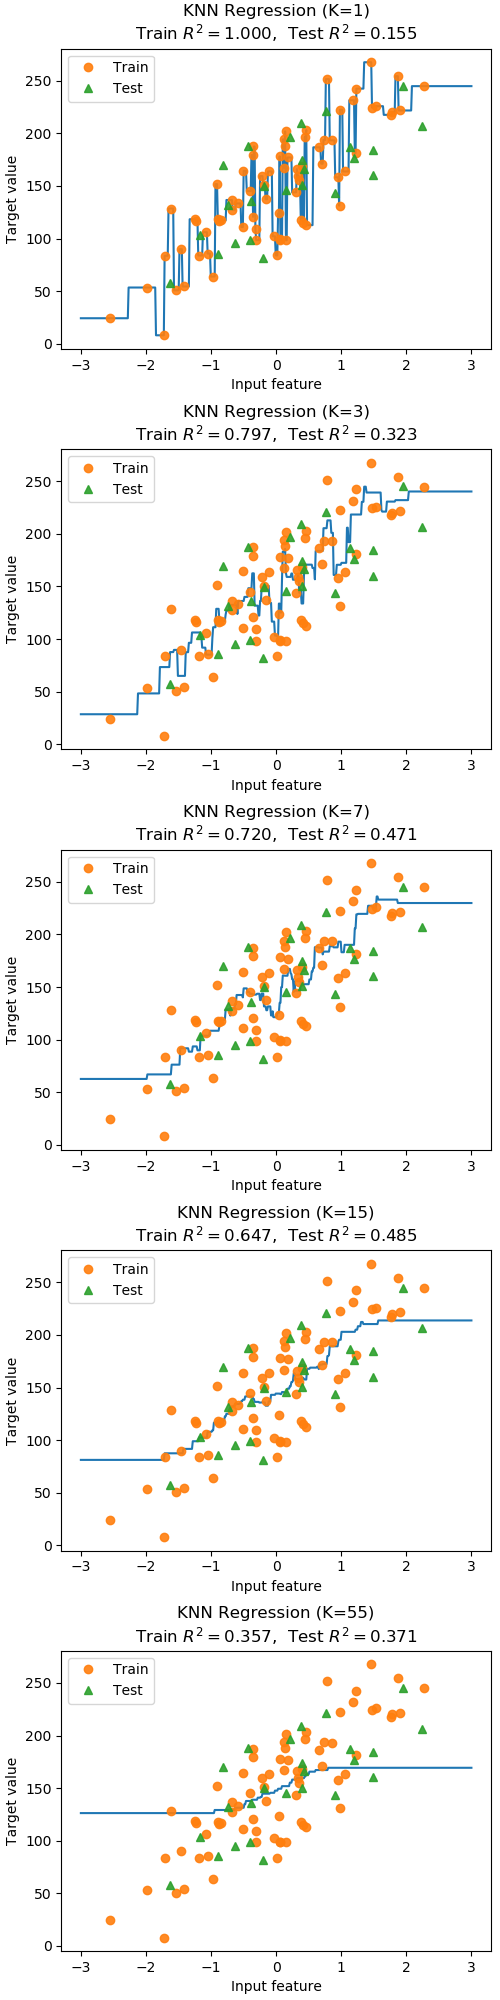

In [11]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


Starting on the top when $k = 1$, the regression model fits the training data perfectly with a r-squared score of $1.0$. But it's very bad at predicting the target values for new data samples, as reflected in the r-squared test score of only $0.155$. As the value of k increases, again the training set score drops, but the model gets better at generalizing to new data and the test score goes up.

Finally in this series, the model with $k = 15$ has the best test set performance, with an r-squared score of $0.485$. Increasing $k$ much further however to $k = 55$, results in both the training and test set scores dropping back down to lower levels, as the model now starts to under-fit. In other words, it's too simple to do well, even on the training data.

## Linear models for regression

### Linear regression

One of the simplest kinds of supervised models are linear models. A linear model expresses the target output value in terms of a sum of weighted input variables. But these are pretty standard, so I won't include too many notes about this one. My notes will rotate much more around the code here, and not around what a linear model is. (Side note: Linear regression is NOT machine learning. Can't change my mind.)

Linear regression in Scikit-Learn is implemented by the linear regression class in the sklearn.linear_model module. As we did with other estimators in Scikit-Learn, we use the `train_test_split` function on the original data set, and then create and fit the linear regression object using the training data in `X_train` and the corresponding training data target values in `y_train`. Here, note that we're doing the creation and fitting of the linear regression object in one line by chaining the fit method with the constructor for the new object.

The linear regression fit method acts to estimate the future weights `w`, which are called the coefficients of the model, and it stores this in the `coef_` attribute, and the bias term, `b`, which is stored in the `intercept_` attribute. Note that if a Scikit-Learn object attribute ends with an underscore, this means that these attributes were derived from training data. 

If we dump the `coef_` and `intercept_` attributes for this simple example, we see that because there's only one input feature variable, there's only one element in the `coef_` list, the value $45.71$. The intercept attribute has a value of about $148.4$. We also include the R-squared score below to give our first try at scoring a regression model. 

In [12]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear regression: example plot 

Here is some code we can use to plot the least-squares linear solution for this dataset.

<IPython.core.display.Javascript object>


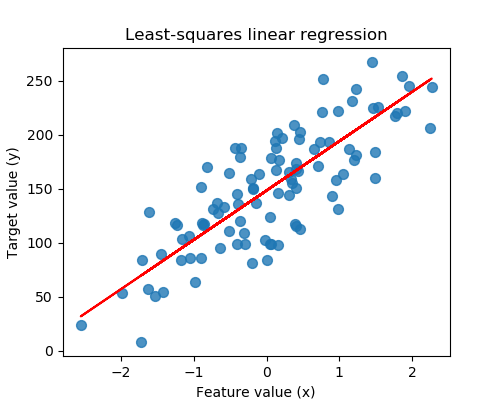

In [13]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

Now that we have seen both K nearest neighbors regression and least-squares regression, it's interesting now to compare the least-squared linear regression results with the K nearest neighbors result. We will leave this for the user to do on their own.

Below we make a linear regression model that can make predictions based off of the crime dataset that they didn't go over in the lecture. I guess we'll just skip over this one...

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725806212
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]
R-squared score (training): 

### Ridge regression

Ridge regression uses the same least-squares criterion as linear regression, but with one difference. During the training phase, it adds a penalty for feature weights that are too large. You'll see that large weights means mathematically that the sum of their squared values is large.

So why would something like ridge regression be useful? This addition of a penalty term to a learning algorithm's objective function is called Regularisation. Regularisation is an extremely important concept in machine learning. It's a way to prevent overfitting, and thus, improve the likely generalization performance of a model by restricting the models possible parameter settings. Usually the effect of this restriction from regularisation is to reduce the complexity of the final estimated model. 

So how does this work with linear regression? The addition of the sum of squared parameter values  to the least-squares objective means that models with larger feature weights add more to the objective functions overall value. Because our goal is to minimize the overall objective function, the regularisation term acts acts a penalty of models with lots of large feature weight values. In other words, all things being equal, if ridge regression finds two possible linear models that predict the training data values equally well, it will prefer the linear model that has a smaller overall sum of squared feature weights.

The practical effect of using ridge regression, is to find the feature weights that fit the data well in at least square sense, and that set lots of the feature weights two values that are very small. We don't see this effect with a single variable linear regression example, but for regression problems with dozens or hundreds of features, the accuracy improvement from using regularized linear regression like ridge regression could be significant. 

The amount of regularisation to apply is controlled by the alpha parameter. Larger alpha means more regularization and simpler linear models with weights closer to zero. The default setting for alpha is 1.0. Notice that setting alpha to zero corresponds to the special case of ordinary least-squares linear regression that we saw earlier.

In scikit-learn, you use ridge regression by importing the `Ridge` class from `sklearn.linear model`, and then use that estimate or object just as you would for least-squares. The one difference is that you can specify the amount of the ridge regression regularisation penalty using the alpha parameter. Here, we're applying ridge regression to the crime data set. Now, you'll notice here that the results are not that impressive. The R-squared score on the test set is pretty comparable to what we got for least-squares regression. However there is something we can do in applying ridge regression that will improve the results dramatically.

In [15]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358464188
ridge regression linear model coeff:
[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.33e-04
  3.14e-04 -4.14e-04 -1.80e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e-01 -2.68

#### Ridge regression with feature normalization

As we move forward, you'll see as we proceed through the course that feature normalization is important to perform for a number of different learning algorithms, beyond just regularized regression. What this means, is that we may have to scale our feature variables so that their scales all match together, meaning that they are weighted equally before we apply weights to them. 

Here in this example, we're going to apply a widely used form of future normalization called MinMax Scaling, that will transform all the input variables, so they're all on the same scale between zero and one. To do this, we compute the minimum and maximum values for each feature on the training data, and then apply the minmax transformation for each feature. To apply minmax scaling in scikit-learn you import the `MinMaxScalar` object from `sklearn.preprocessing`. To prepare the scalar object for use, you create it, and then call the fit method using the training data Xtrain. As you can see below, we save the scaled values to `X_train_scaled` and `X_test_scaled` to be clear of the differences. 

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044165
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


You may have noticed two things here. First, that we're applying the same scalar object to both the training and the testing. And second, that we're training the scalar object on the training data and not on the test data. These are both critical aspects to feature normalization. If you don't apply the same scaling to training and test sets, you'll end up with more or less random data skew, which will invalidate your results.

#### Ridge regression with regularization parameter: alpha

We can see the effect of varying the amount of regularisation on the scale to training and test data using different settings for alpha in this example. Significantly larger or smaller values of alpha, both lead to significantly worse model fit. This is another illustration of the general relationship between model complexity and test set performance. 

In [17]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5176443051143985e-18 / 1.1102230246251565e-16
  RuntimeWarning)


### Lasso regression

Another kind of regularized regression that you could use instead of ridge regression is called Lasso Regression. Like ridge regression, lasso regression adds a regularisation penalty term to the ordinary least-squares objective. With lasso regression, a subset of the coefficients are forced to be precisely zero, which is a kind of automatic feature selection, since with the weight of zero the features are essentially ignored completely in the model. This sparse solution where only a subset of the most important features are left with non-zero weights, also makes the model easier to interpret. Like ridge regression, the amount of regularisation for the lasso regression is controlled by the parameter alpha, which by default is zero. 

In general, lasso regression is most helpful if you think there are only a few variables that have a medium or large effect on the output variable. Otherwise if there are lots of variables that contribute small or medium effects, ridge regression is typically the better choice.

Let's take a look at lasso regression in scikit-learn using our communities in crime regression data set. To use lasso regression, you import the `Lasso` class from `sklearn.linear_model`, and then just use it as you would use an estimator like ridge regression. With some data sets you may occasionally get a convergence warning, in which case you can set the `max_iter` attribute to a larger value, so typically at least 20,000. Increasing the `max_inter` parameter will increase the computation time accordingly. In this example, we're applying lasso to a minmax scale version of the crime data set as we did for ridge regression. You can see that for Alpha set to 2.0, only 20 features with non-zero weights remain because with lasso regularisation, most of the features are set to have weights of exactly zero. 

We'll also list the features with non-zero weights in order of their descending magnitude from the output. Although we need to be careful in interpreting any results for data on a complex problem like crime, the lasso regression results do help us see some of the strongest relationships between the input variables and outcomes for this particular data set. 


In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

#### Lasso regression with regularization parameter: alpha

Finally, we can see the effect of tuning the regularisation parameter alpha for lasso regression. Like we saw with ridge regression, there's an optimal range for alpha that gives the best test set performance that neither under or over fits. Of course this best alpha value will be different for different data sets, and depends on various other factors such as the feature preprocessing methods being used. 

In [19]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



### Polynomial regression

This is just a linear regression model where some of the features are raised by a power and added in to the original linear regression format. This is easy enough to follow, so again, the notes will be light here. 

When we add these new polynomial features, we're essentially adding to the model's ability to capture interactions between the different variables by adding them as features to the linear model.

Here's an example of polynomial regression using scikit-learn. There's already a handy class called `PolynomialFeatures` in the `sklearn.preprocessing` module that will generate these polynomial features for us. 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(p

This example shows three regressions on a more complex regression dataset, that happens to have some quadratic interactions between variables. The first regression here, just uses least-squares regression without the polynomial feature transformation. The second regression creates the polynomial features object with degrees set to two, and then calls the fit transform method of the polynomial features object on the original `X_F1` features, to produce the new polynomial transform features `X_F1` poly. The code then calls ordinary least-squares linear regression. You can see indications of overfitting on this expanded feature representation, as the models r-squared score on the training set is close to one but much lower on the test set. So the third regression shows the effect of adding regularisation via ridge regression on this expanded feature set. Now, the training and test r-squared scores are basically the same, with the test set score of the regularized polynomial regression performing the best of all three regression methods.

## Linear models for classification

### Logistic regression



#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Support Vector Machines

#### Linear Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [ ]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

#### Multi-class results on the fruit dataset

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d['height'], X_fruits_2d['width'],
            c=y_fruits_2d, cmap=cmap_fruits, edgecolor='black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

In [ ]:
print(test_scores)

In [ ]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Setting max decision tree depth to help avoid overfitting

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

#### Visualizing decision trees

In [ ]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### Feature importance

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [ ]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()